__Compare FWI result with true model for the Overthrust model__

Daniel Köhn 
Kiel, 16/07/2016

__Import Libraries__

In [74]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.colors import LightSource, Normalize
from matplotlib.pyplot import gca
from pylab import rcParams
from matplotlib import rc
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mtick
import scipy.ndimage.filters
from scipy.ndimage.filters import gaussian_filter
import pickle

__Activate different post-processing options__

In [75]:
GAUSSIAN=0;

__FD grid dimensions__

In [76]:
DH = 0.05
NX = 2000
NY = 1216

__Wavefield clip value__ 

In [77]:
clip = 5e0
vpmin = 60.0
vpmax = 800.0

__Define fonts__

In [78]:
FSize = 15
font = {'color':  'black',
        'weight': 'normal',
        'size': FSize}
mpl.rc('xtick', labelsize=FSize) 
mpl.rc('ytick', labelsize=FSize) 
rcParams['figure.figsize'] = 16, 10.5

__Read FWI result and true model__

In [79]:
# f = open("../start/Kleinneudorf_fsurf.vs")
f = open("../FWI_results/FA-FWI_init/31_03_2018_Qs_15/modelTest_vs_stage_18.bin")
data_type = np.dtype ('float32').newbyteorder ('<')
mod_true = np.fromfile (f, dtype=data_type)
mod_true = mod_true.reshape(NX,NY)
mod_true = np.transpose(mod_true)
mod_true = np.flipud(mod_true)

In [80]:
f = open("taper_p100_large.bin")
data_type = np.dtype ('float32').newbyteorder ('<')
taper = np.fromfile (f, dtype=data_type)
taper = taper.reshape(NX,NY)
taper = np.transpose(taper)
taper = np.flipud(taper)

In [81]:
f = open("04_05_2018_bp_80_120Hz_offset_full_p100_FWI/RTM_S_image.bin")
data_type = np.dtype ('float32').newbyteorder ('<')
RTM_TD = np.fromfile (f, dtype=data_type)
RTM_TD = RTM_TD.reshape(NX,NY)
RTM_TD = np.transpose(RTM_TD)
RTM_TD = np.flipud(RTM_TD)
RTM_TD = scipy.ndimage.filters.laplace(RTM_TD) # suppress low-wavenumber artifacts in image
RTM_TD *= taper

__Apply Gaussian filter__

In [82]:
if(GAUSSIAN==1):
    RTM_TD = gaussian_filter(RTM_TD, sigma=[1,6])

__Define Axis__

In [83]:
x = np.arange(DH, DH*(NX+1), DH)
y = np.arange(DH, DH*(NY+1), DH)

__Scale RTM result with depth__

In [84]:
RTM_scale = np.zeros((NX,NY))
RTM_scale += np.flipud(y)**4
RTM_TD*=RTM_scale.transpose()

__Define SubPlot__

In [85]:
def do_plot(n, model, cm, an, title, vpmin, vpmax):
    
    ax=plt.subplot(2, 1, n)
    extent = [x[0],x[-1],y[0],y[-1]]
    #plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    ## for Palatino and other serif fonts use:
    #rc('font',**{'family':'serif','serif':['Palatino']})
    #plt.rc('text', usetex=True)
    rc('text', usetex=True)
    
    if(n==1):
        im1 = plt.imshow(mod_true, cmap=plt.cm.jet, interpolation='nearest', extent=extent, aspect=1)
        plt.hold(True)

    im2 = plt.imshow(RTM_TD, cmap=plt.cm.gray, alpha=.75, interpolation='bicubic',
                 extent=extent, vmin=-clip, vmax=clip, aspect=1)
    
    a = gca()
    a.set_xticklabels(a.get_xticks(), font)
    a.set_yticklabels(a.get_yticks(), font)
    a.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0d'))
    a.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0d'))
    #plt.axis('scaled')
    plt.title(title, fontdict=font)
    plt.ylabel('Depth [m]', fontdict=font)
    if(n==2):
        plt.xlabel('Distance [m]', fontdict=font)
    if(n==1):
        ax.set_xticks([]) 
    plt.gca().invert_yaxis()
    
    # add annotation
    #if n!=2:
    #    plt.text(0.5, 4.2,an,fontdict=font,color='white',size=20)
    
    # fit and label colorbar
    #divider = make_axes_locatable(ax)
    #cax = divider.append_axes("right", size="2.5%", pad=0.05)
    #cbar = plt.colorbar(im1, cax=cax)
    #cbar.set_label(an, fontdict=font, labelpad=3)

__Plot SubPlots__

C:\Users\daniel_koehn\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\daniel_koehn\Anaconda3\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\daniel_koehn\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
C:\Users\daniel_koehn\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


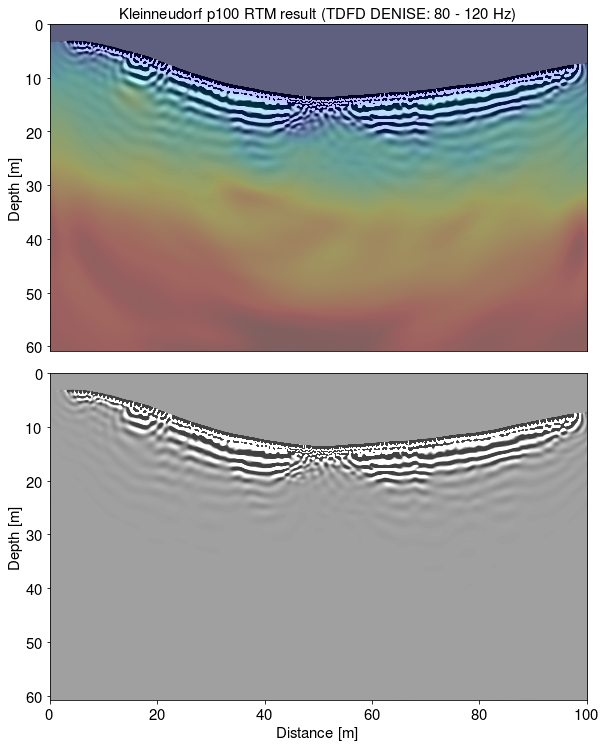

In [86]:
plt.close('all')
plt.figure()
do_plot(1, RTM_TD, 'gray', 'Vp [m/s]', r"Kleinneudorf p100 RTM result (TDFD DENISE: 80 - 120 Hz)", -clip, clip)
do_plot(2, RTM_TD, 'gray', 'Vp [m/s]', r"", -clip, clip)
#plt.savefig('test.png', bbox_inches='tight', format='png', dpi=200)
#plt.savefig('Kleinneudorf_RTM_DENISE.pdf', bbox_inches='tight', format='pdf')
plt.tight_layout()
plt.show()